In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import math
from scipy.stats import f
#%pip install numpy_indexed
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [2]:
df = pd.read_csv("../CleansedDataSets/morefeaturesdecemberdata.csv")

In [3]:
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()
df.head()

,MDM current (A),Actual Volume Flow (Nm3/sec),VDV Pos [%] (%),IGV Pos [%] (%),Oil Tank Temperature (Degree C),Oil Filter dp (bar),Inlet Filter dp (Pa),Outlet Temp. (Degree C),Inlet Air Temp. (Degree C),Isentropic His (J/kg),Phi
timestamp,,,,,,,,,,,
2021-12-01 16:48:56.924,87.761337,6.217404,72.0,80.0,63.821827,-0.523553,0.002356,80.841171,19.755072,50871.348527,0.115442
2021-12-01 16:48:58.815,88.116127,6.216372,72.0,80.0,63.821827,-0.523553,0.002356,80.841171,19.755072,50870.672880,0.115295
2021-12-01 16:49:06.925,88.116127,6.246867,72.0,80.0,63.821827,-0.522028,0.002356,80.841171,19.755072,50881.026537,0.115901
2021-12-01 16:49:11.941,88.116127,6.276054,72.0,80.0,63.821827,-0.523858,0.002356,80.841171,19.755072,50890.922275,0.116534
2021-12-01 16:49:13.599,88.116127,6.295461,72.0,80.0,63.821827,-0.523858,0.002356,80.841171,19.755072,50897.396769,0.116197


In [4]:
df = df.loc[df["Phi"]< 2]

<AxesSubplot:>

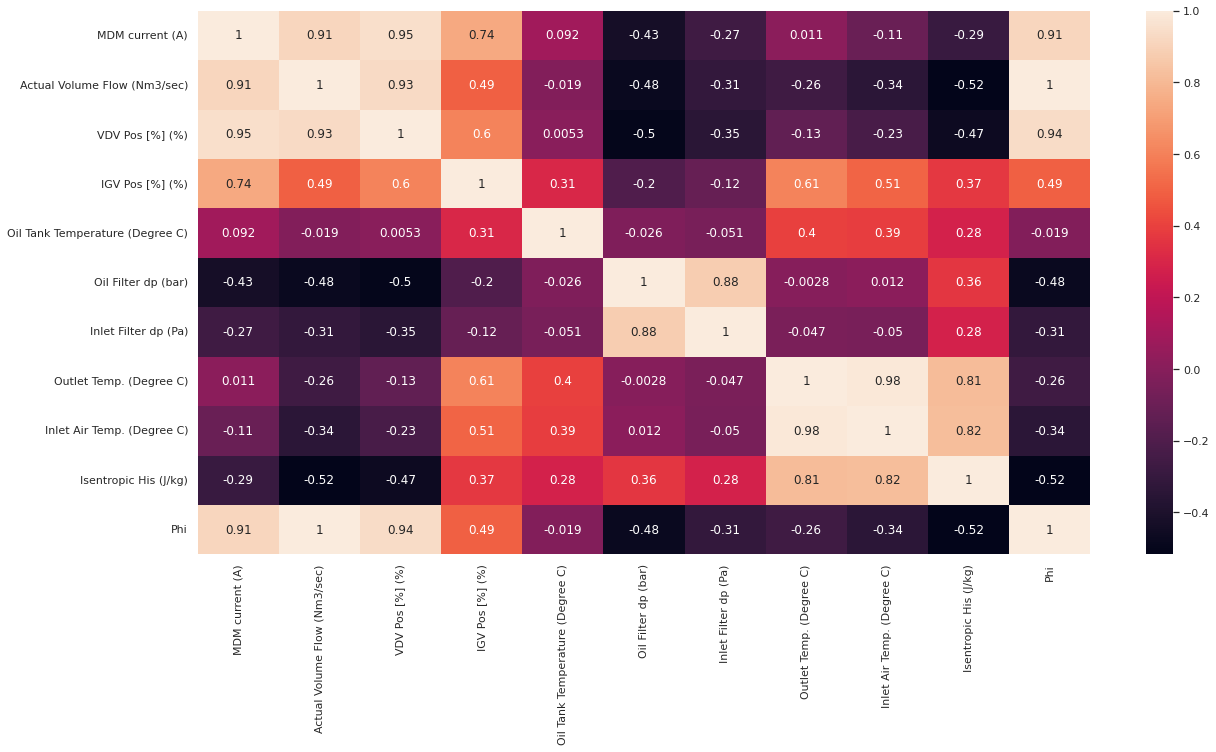

In [5]:
sns.heatmap(df.corr(), annot=True)

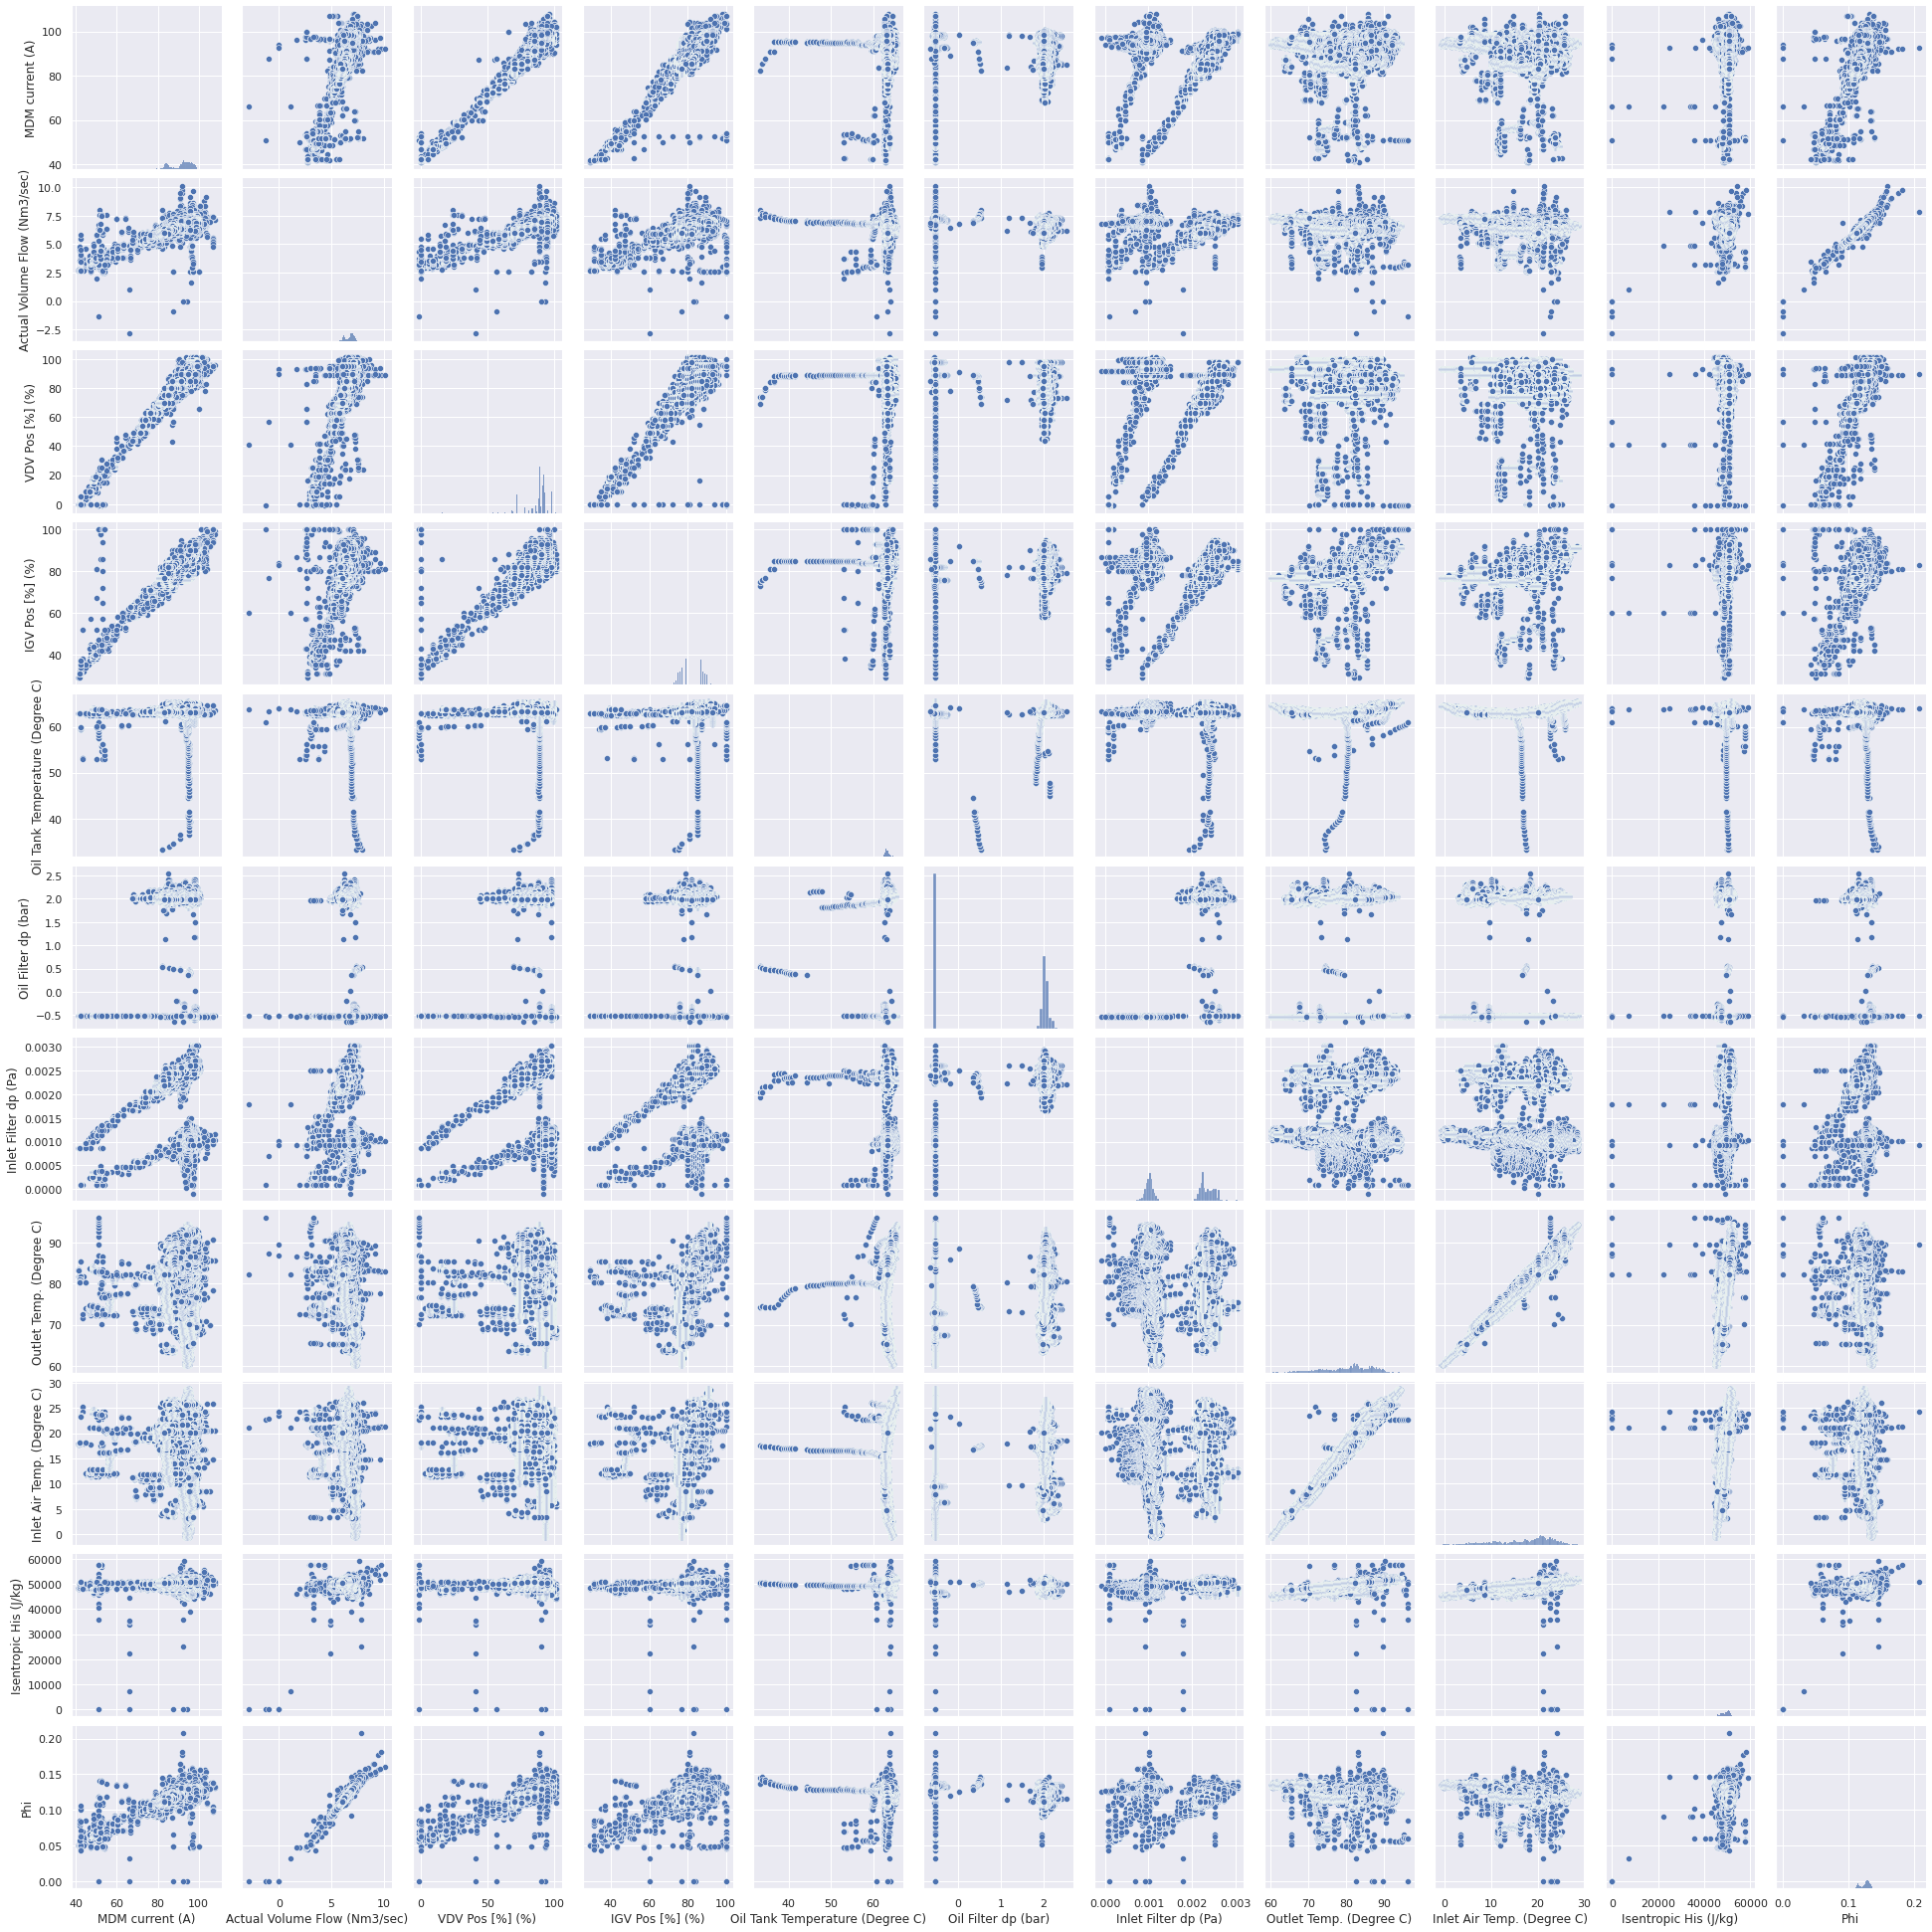

In [6]:
sns.pairplot(df)

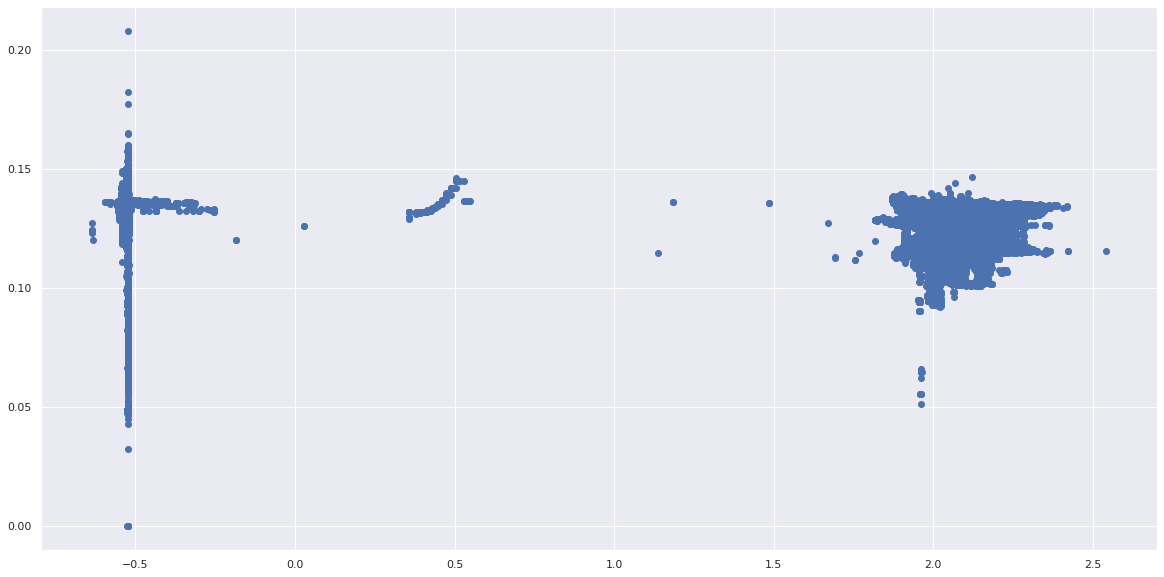

In [7]:
plt.scatter(x=df["Oil Filter dp (bar)"], y=df["Phi"])

<AxesSubplot:>

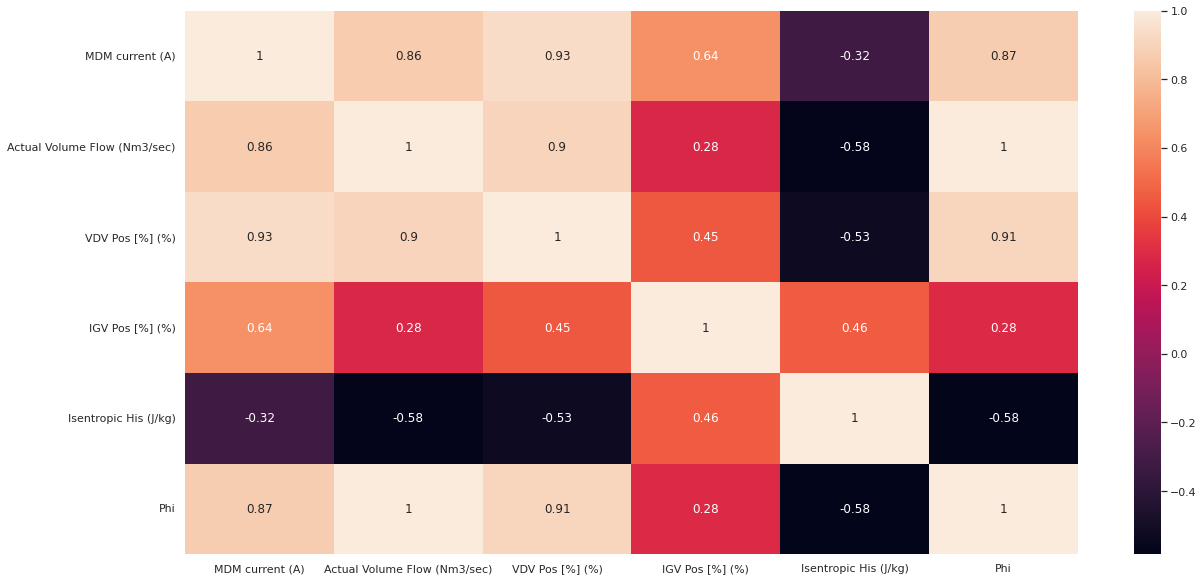

In [8]:
df = pd.read_csv("../CleansedDataSets/Interpolationvaldf.csv")
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()
df.head()
sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

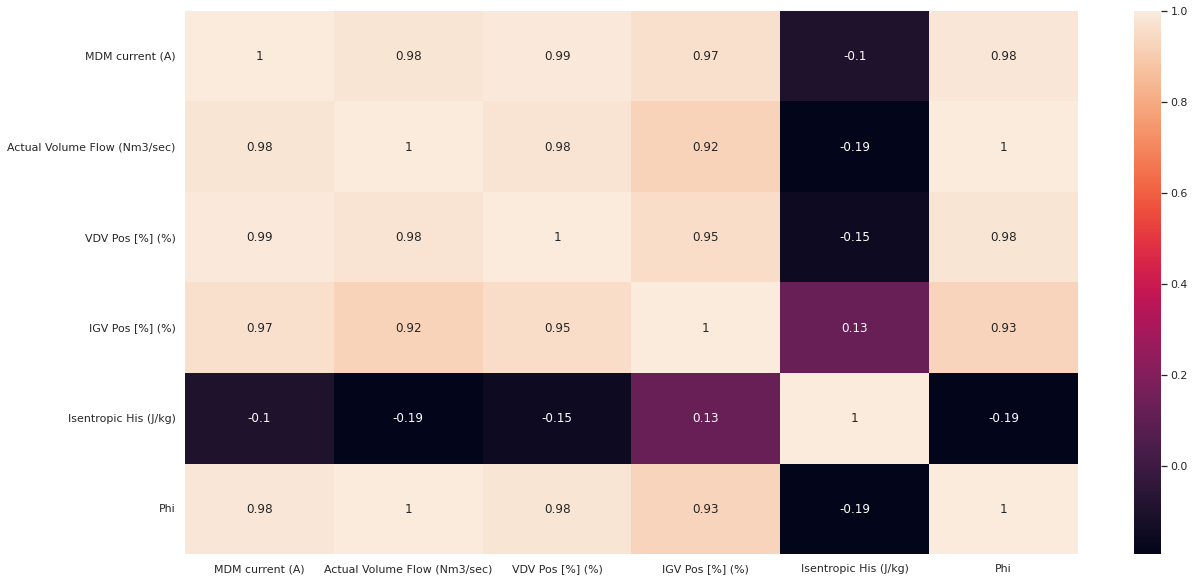

In [9]:
df2 = pd.read_csv("../CleansedDataSets/Interpolationdf.csv")
df2['timestamp']= pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')
df2 = df2.sort_index()
df2.head()
sns.heatmap(df2.corr(), annot=True)

## Inlet Guide Vane correlation is very weak in december but very strong in Jan-March

### The December Data

Text(0, 0.5, 'Phi')

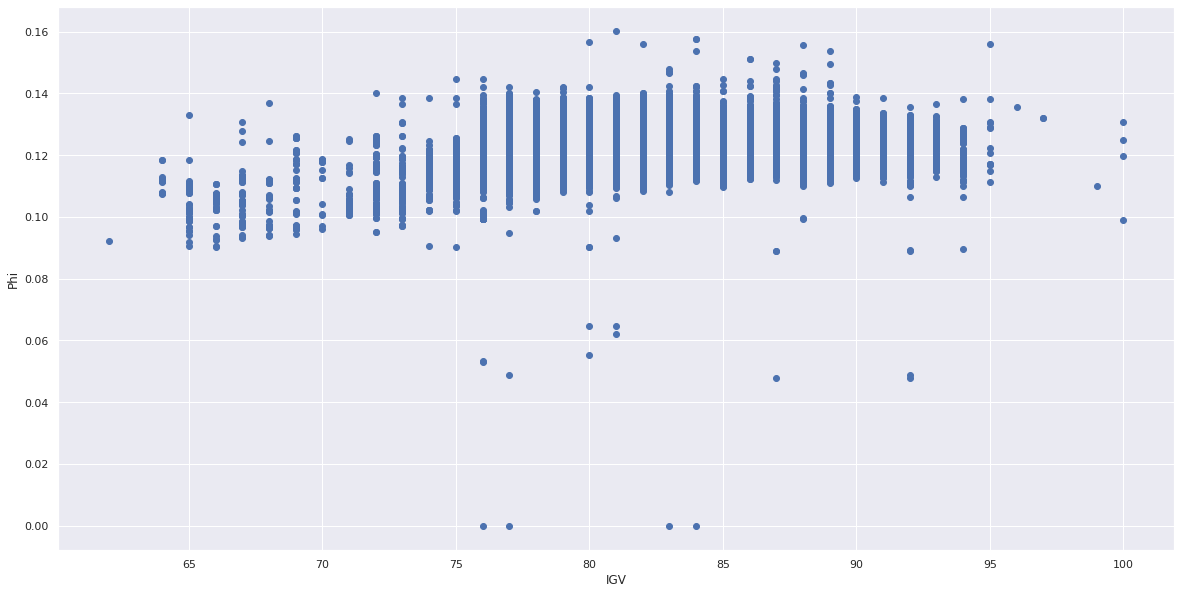

In [10]:
plt.scatter(x=df["IGV Pos [%] (%)"], y=df["Phi"])
plt.xlabel("IGV")
plt.ylabel("Phi")

Text(0, 0.5, 'Phi')

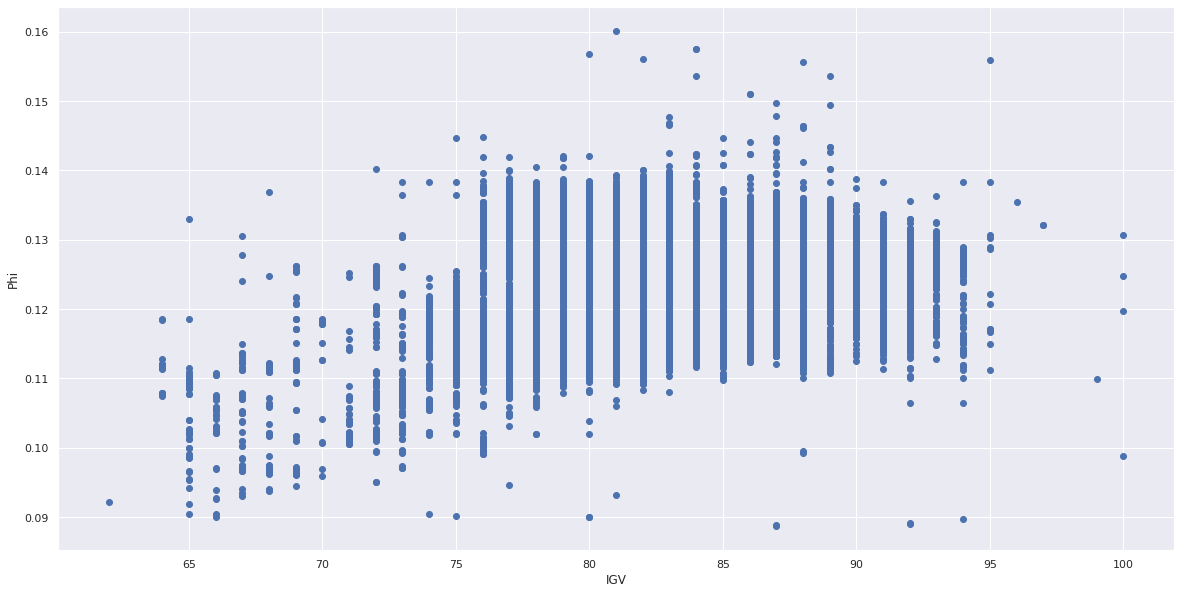

In [11]:
df = df.loc[df["Phi"]>0.08]
plt.scatter(x=df["IGV Pos [%] (%)"], y=df["Phi"])
plt.xlabel("IGV")
plt.ylabel("Phi")

### Jan - March Data

Text(0, 0.5, 'Phi')

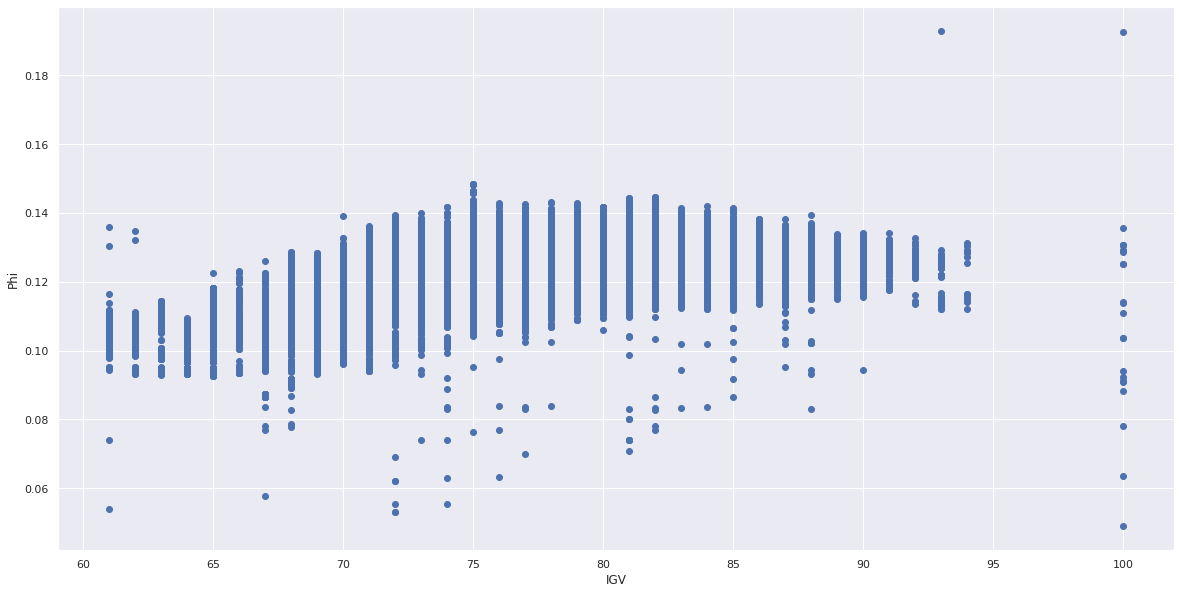

In [12]:
df2 = df2.loc[df2["Phi"]<0.2]
df2 = df2.loc[df2["IGV Pos [%] (%)"]>60]
plt.scatter(x=df2["IGV Pos [%] (%)"], y=df2["Phi"])
plt.xlabel("IGV")
plt.ylabel("Phi")

Text(0, 0.5, 'Phi')

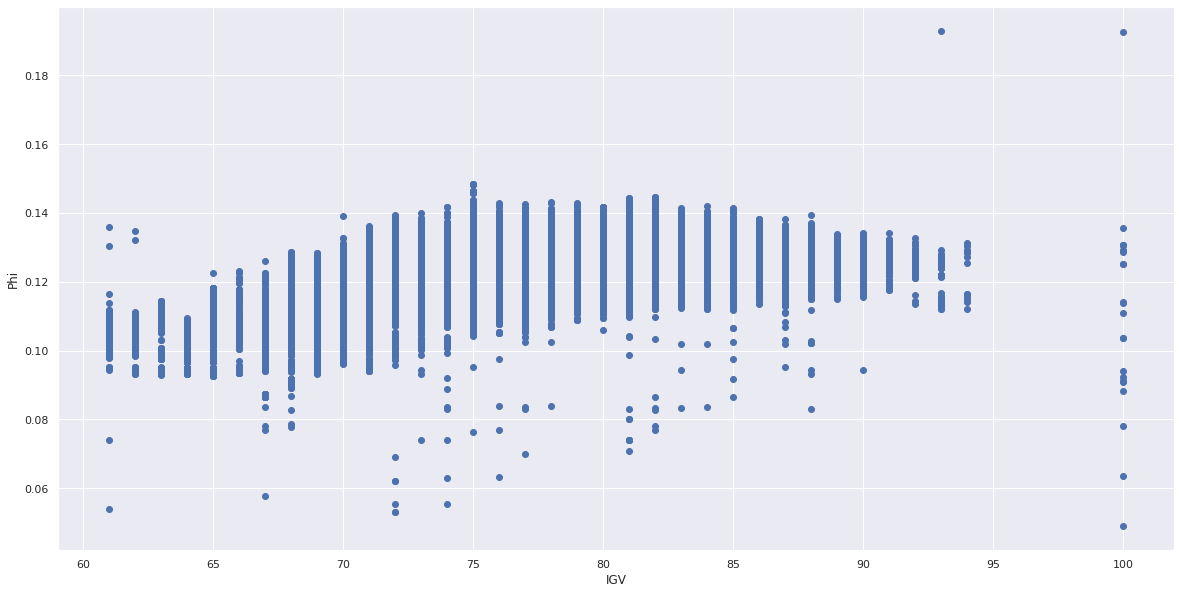

In [13]:
df2 = df2.loc[df2["Phi"]<0.2]
df2 = df2.loc[df2["IGV Pos [%] (%)"]>60]
plt.scatter(x=df2["IGV Pos [%] (%)"], y=df2["Phi"])
plt.xlabel("IGV")
plt.ylabel("Phi")

### Check VVD For Comparison

<AxesSubplot:>

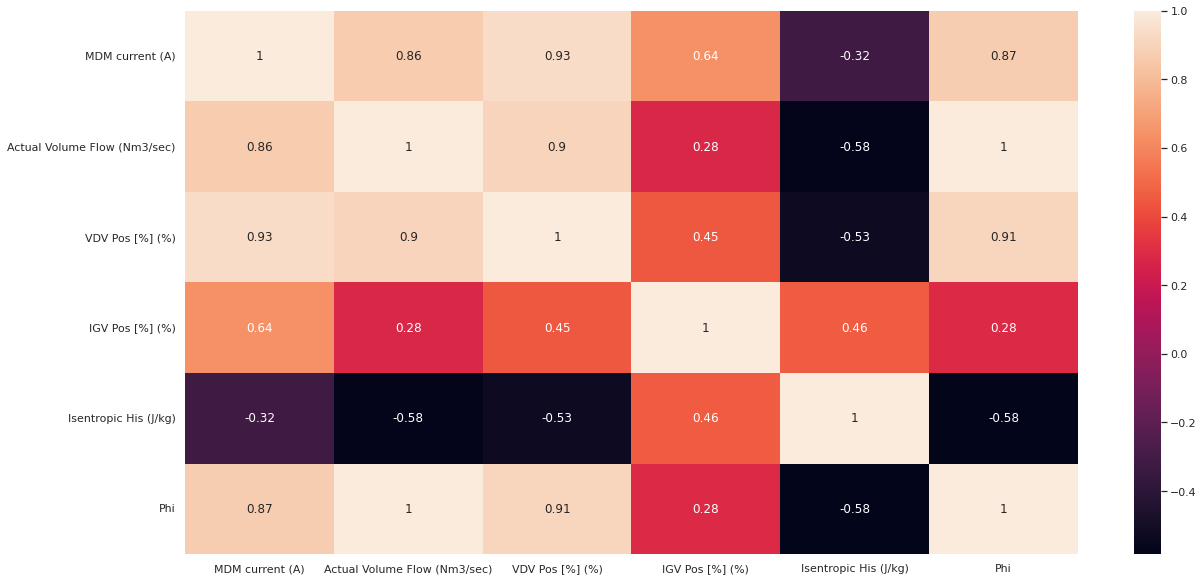

In [14]:
df = pd.read_csv("../CleansedDataSets/Interpolationvaldf.csv")
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()
df.head()
sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

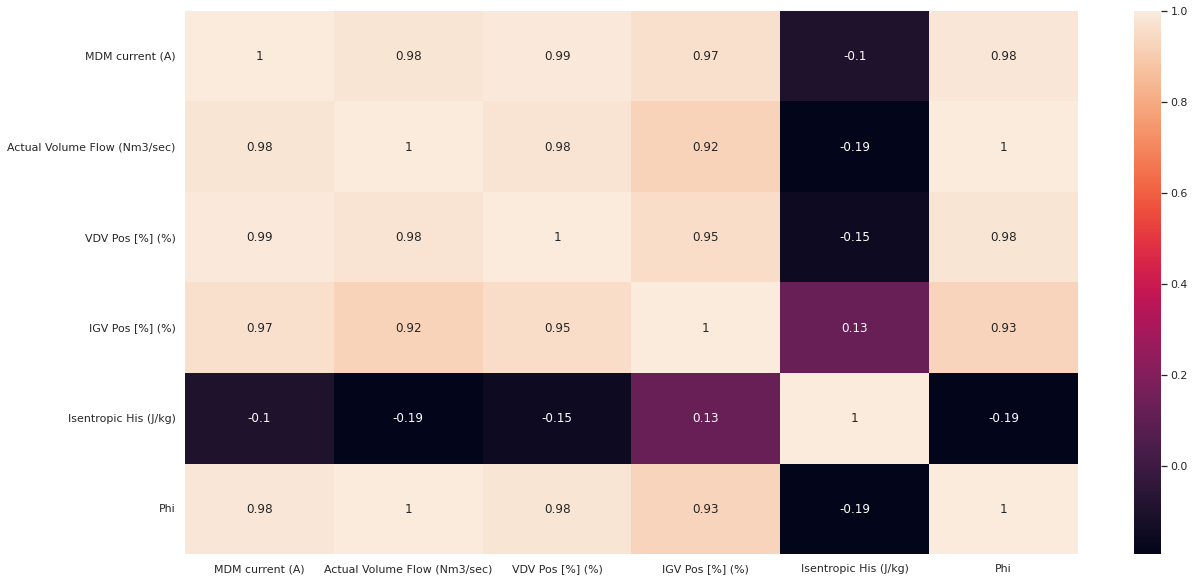

In [15]:
df2 = pd.read_csv("../CleansedDataSets/Interpolationdf.csv")
df2['timestamp']= pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')
df2 = df2.sort_index()
df2.head()
sns.heatmap(df2.corr(), annot=True)

Text(0, 0.5, 'Phi')

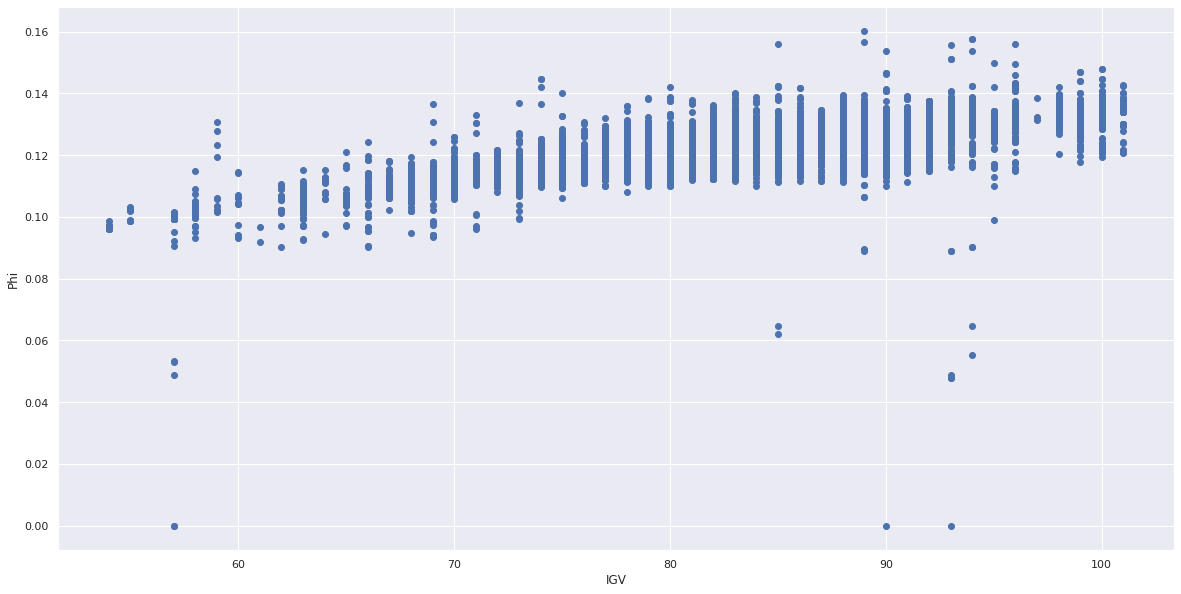

In [16]:
plt.scatter(x=df["VDV Pos [%] (%)"], y=df["Phi"])
plt.xlabel("IGV")
plt.ylabel("Phi")

Text(0, 0.5, 'Phi')

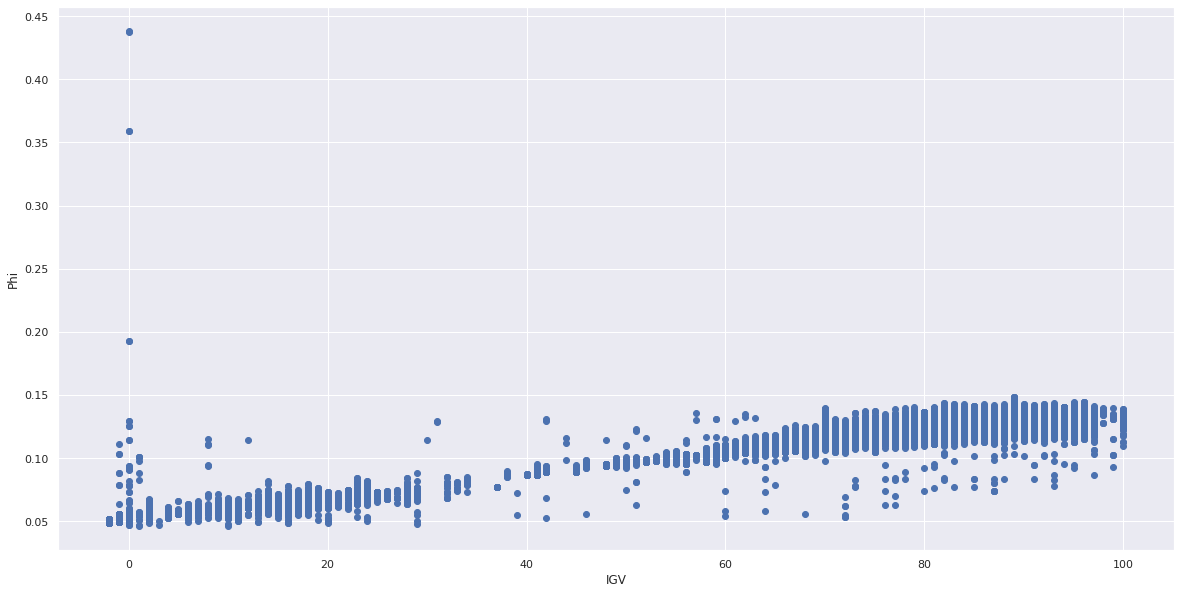

In [17]:
plt.scatter(x=df2["VDV Pos [%] (%)"], y=df2["Phi"])
plt.xlabel("IGV")
plt.ylabel("Phi")

What was happening to cause the IGV positions to provide such a varied output?

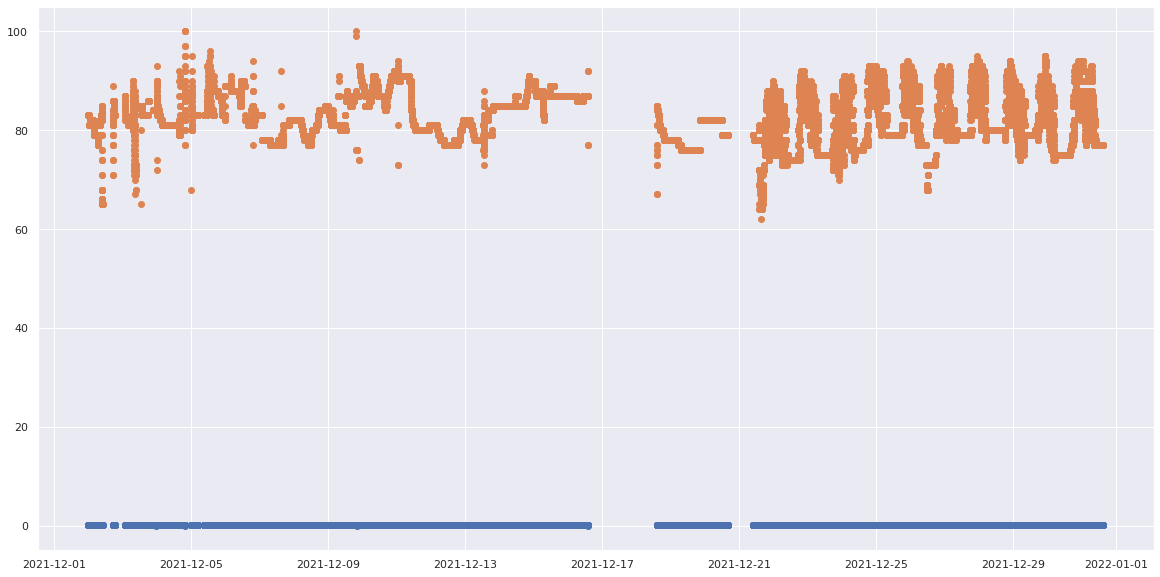

In [18]:
plt.scatter(x=df.index, y=df["Phi"])
plt.scatter(x=df.index, y=df["IGV Pos [%] (%)"])

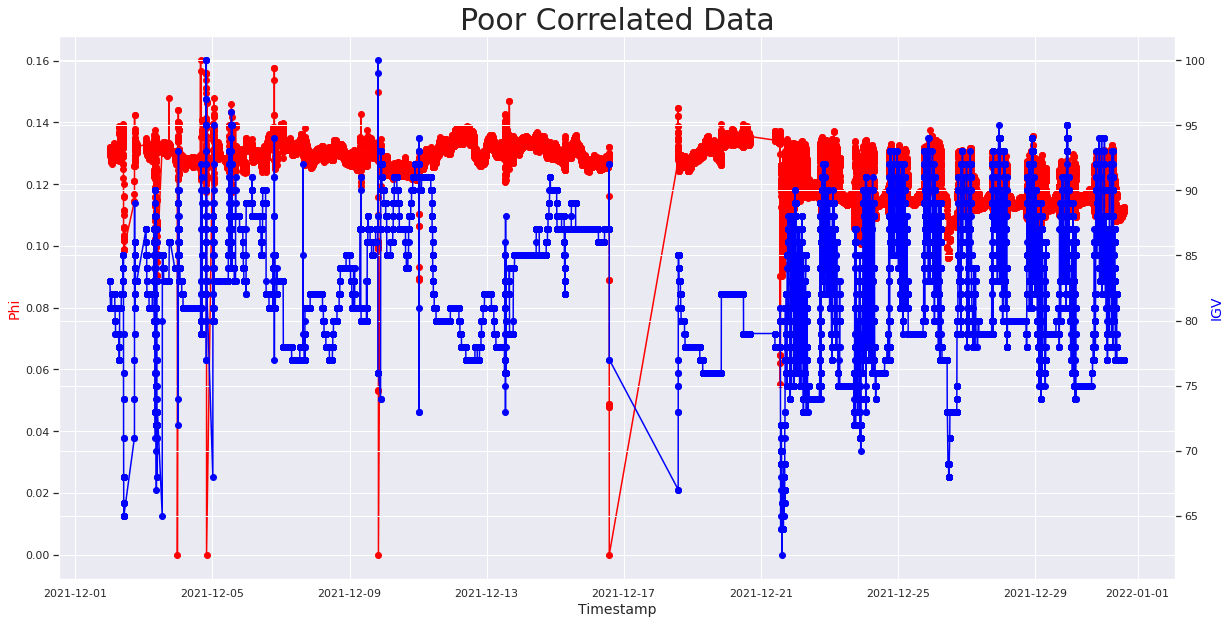

In [19]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df.index,
        df["Phi"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Timestamp", fontsize = 14)
# set y-axis label
ax.set_ylabel("Phi",
              color="red",
              fontsize=14)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.index, df["IGV Pos [%] (%)"],color="blue",marker="o")
ax2.set_ylabel("IGV",color="blue",fontsize=14)
plt.title("Poor Correlated Data", fontsize=30)
plt.show()



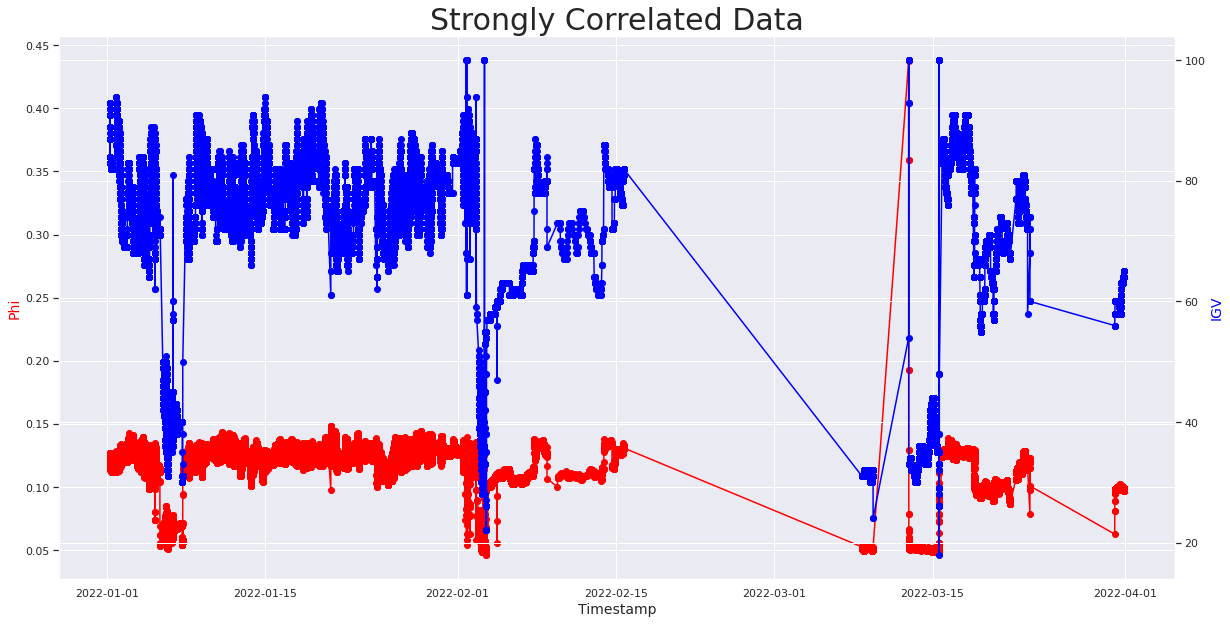

In [20]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df2.index,
        df2["Phi"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Timestamp", fontsize = 14)
# set y-axis label
ax.set_ylabel("Phi",
              color="red",
              fontsize=14)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df2.index, df2["IGV Pos [%] (%)"],color="blue",marker="o")
ax2.set_ylabel("IGV",color="blue",fontsize=14)
plt.title("Strongly Correlated Data", fontsize=30)
plt.show()

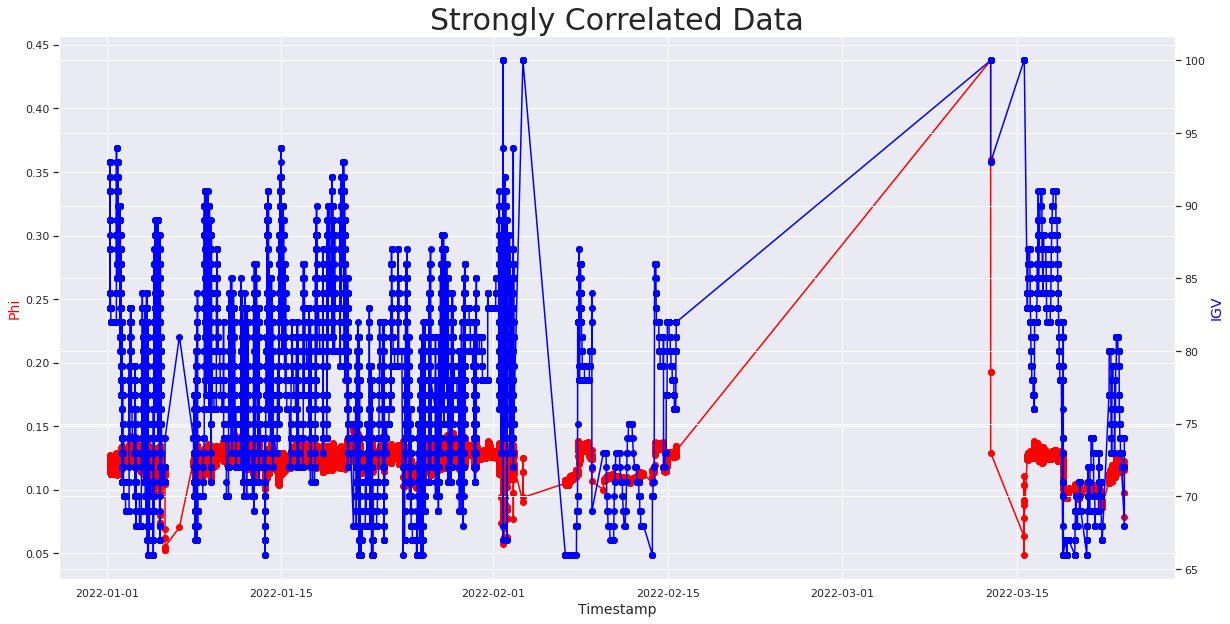

In [21]:
df2 = df2.loc[df2["IGV Pos [%] (%)"]>65]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df2.index,
        df2["Phi"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Timestamp", fontsize = 14)
# set y-axis label
ax.set_ylabel("Phi",
              color="red",
              fontsize=14)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df2.index, df2["IGV Pos [%] (%)"],color="blue",marker="o")
ax2.set_ylabel("IGV",color="blue",fontsize=14)
plt.title("Strongly Correlated Data", fontsize=30)
plt.show()


Data After 12th of december is where is seems to go off track

In [35]:
subset = df.iloc[df.index > '2021-12-21']



<AxesSubplot:>

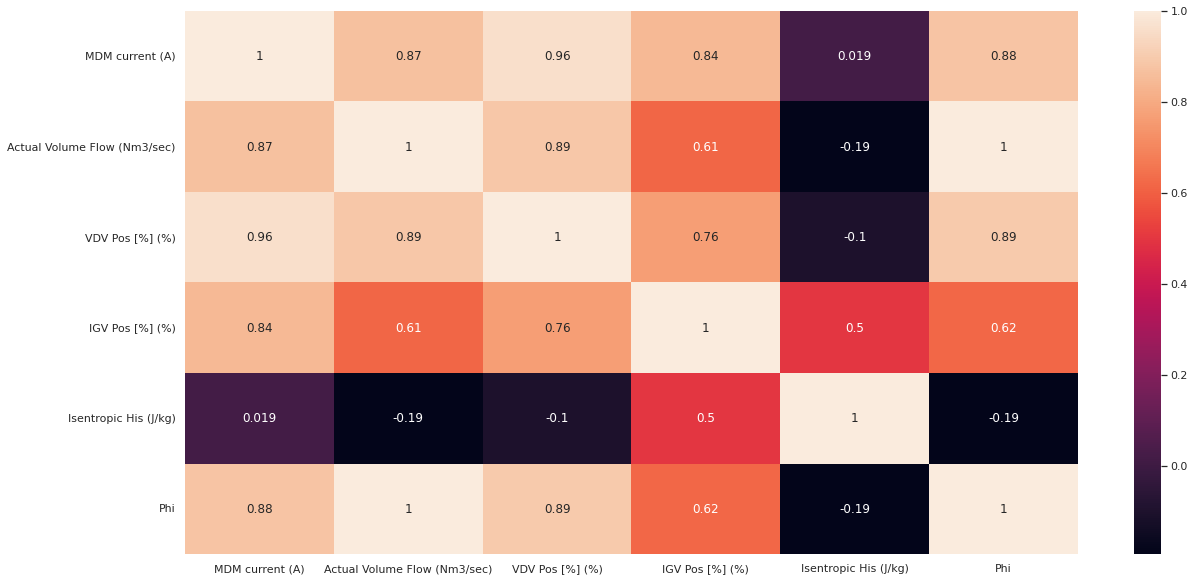

In [36]:
sns.heatmap(subset.corr(), annot=True)

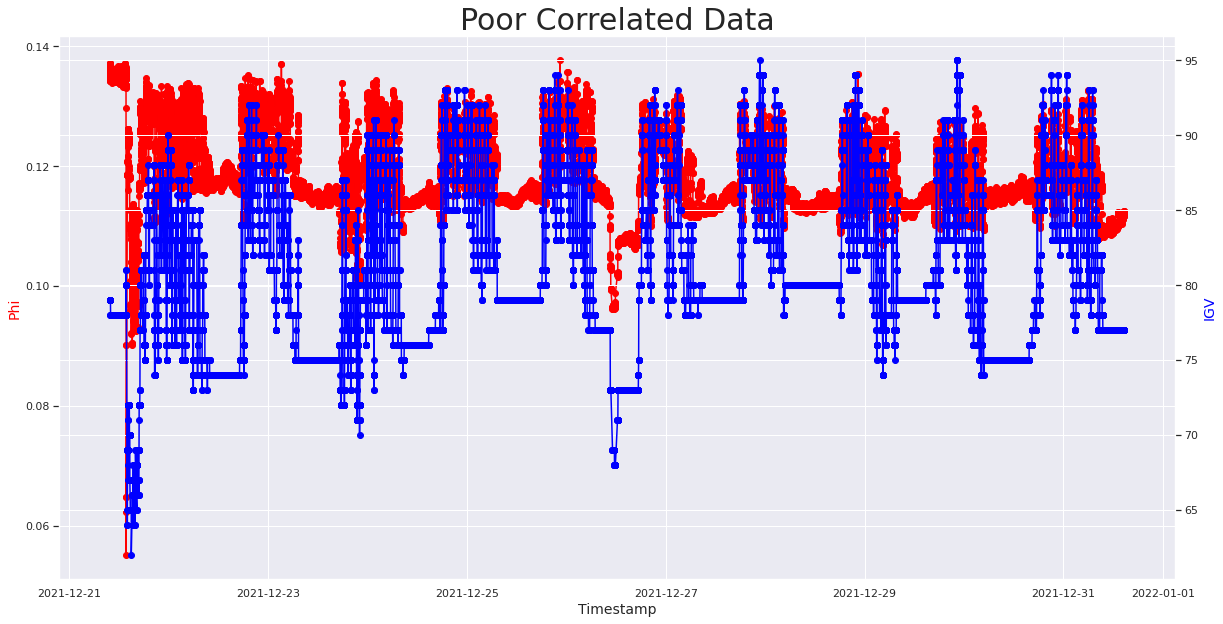

In [37]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(subset.index,
        subset["Phi"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Timestamp", fontsize = 14)
# set y-axis label
ax.set_ylabel("Phi",
              color="red",
              fontsize=14)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(subset.index, subset["IGV Pos [%] (%)"],color="blue",marker="o")
ax2.set_ylabel("IGV",color="blue",fontsize=14)
plt.title("Poor Correlated Data", fontsize=30)
plt.show()


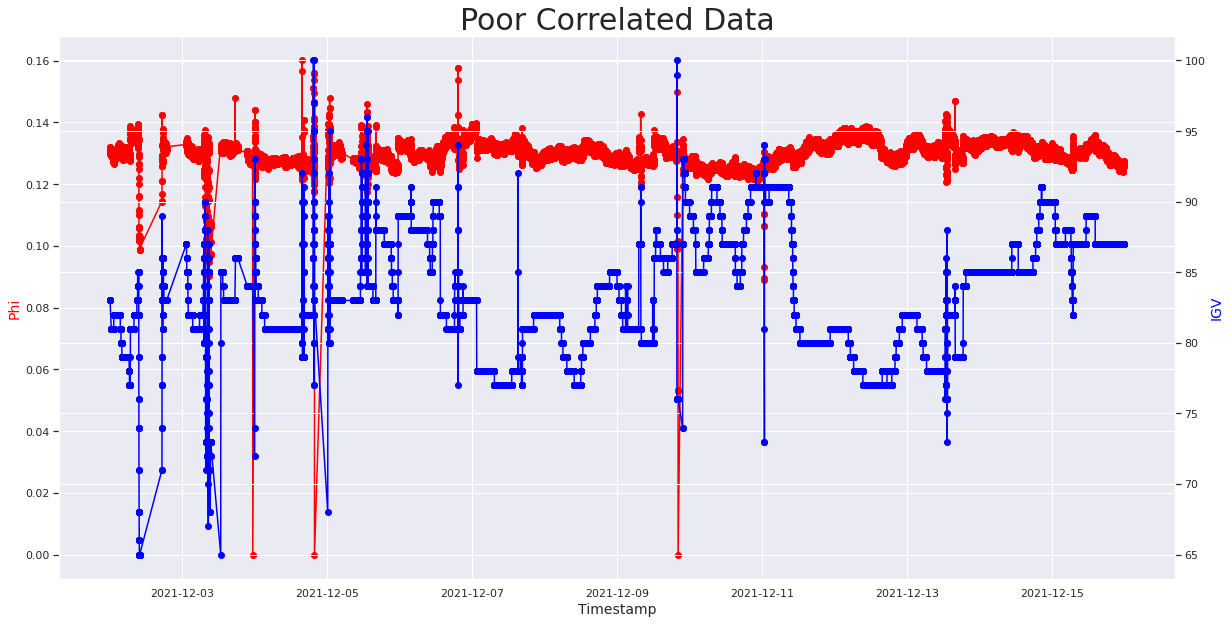

In [40]:
subset = df.iloc[df.index < '2021-12-16']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(subset.index,
        subset["Phi"],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("Timestamp", fontsize = 14)
# set y-axis label
ax.set_ylabel("Phi",
              color="red",
              fontsize=14)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(subset.index, subset["IGV Pos [%] (%)"],color="blue",marker="o")
ax2.set_ylabel("IGV",color="blue",fontsize=14)
plt.title("Poor Correlated Data", fontsize=30)
plt.show()


<AxesSubplot:>

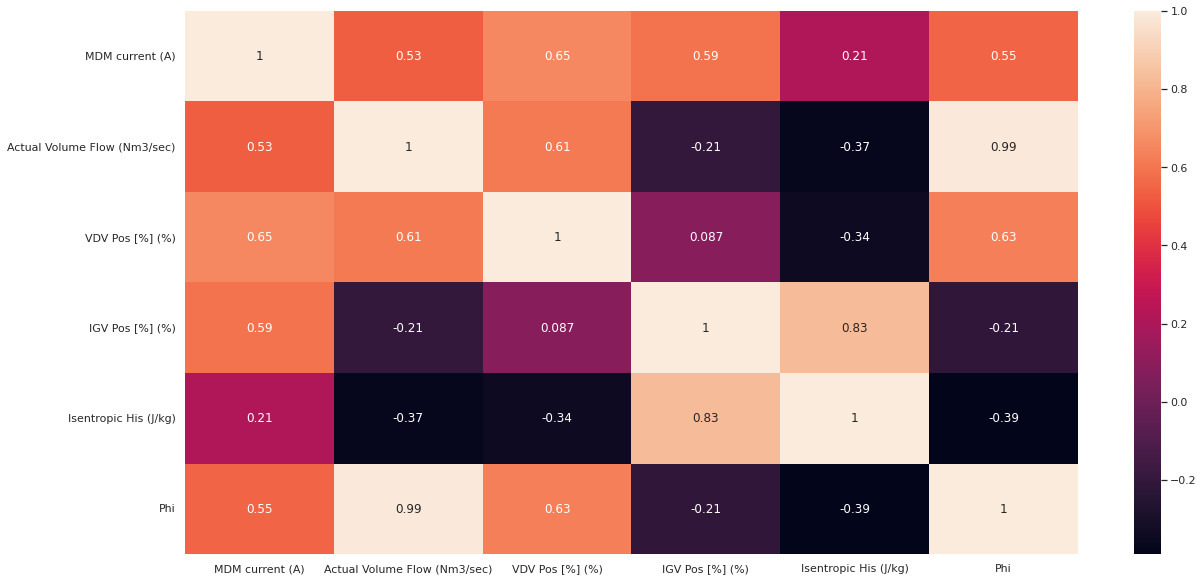

In [41]:
sns.heatmap(subset.corr(), annot=True)

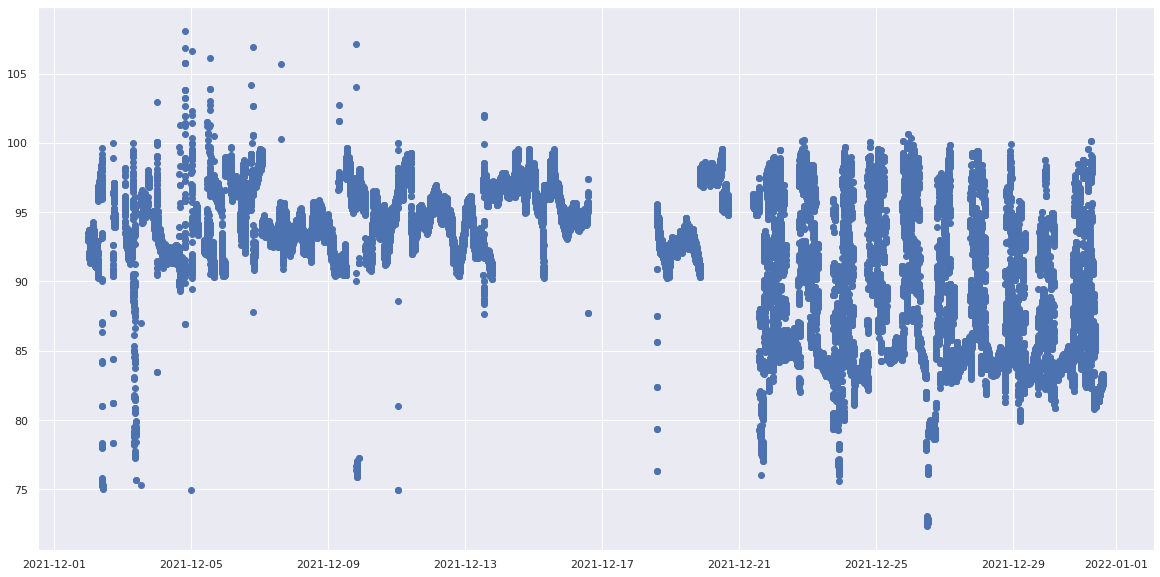

In [27]:
plt.scatter(x=df.index, y=df["MDM current (A)"])

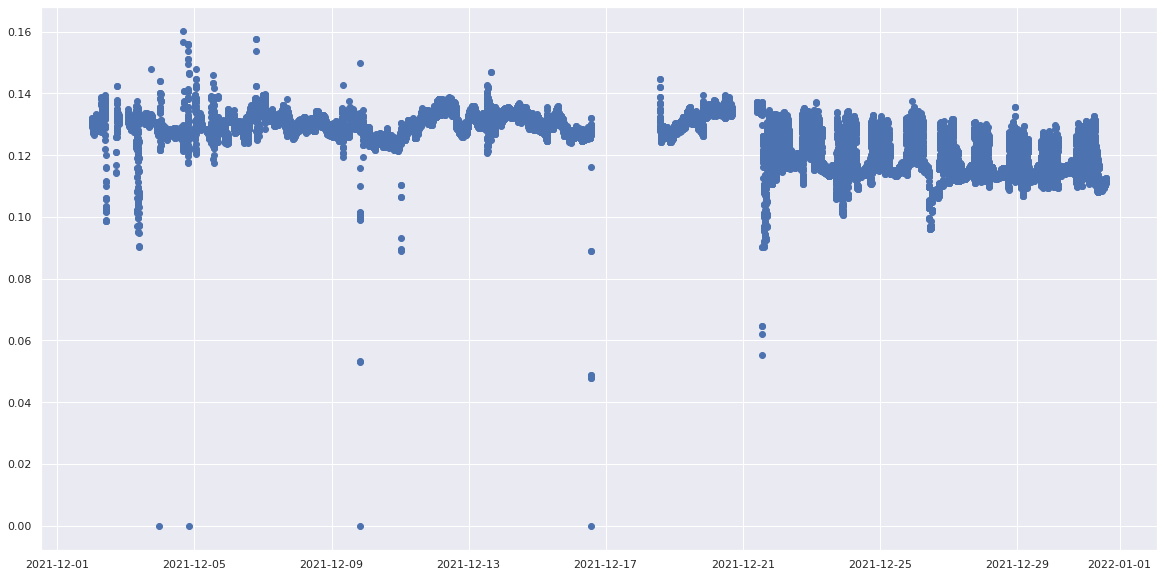

In [28]:
plt.scatter(x=df.index, y=df["Phi"])